In [5]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=2
from plotting_utils import *

env: CUDA_VISIBLE_DEVICES=2


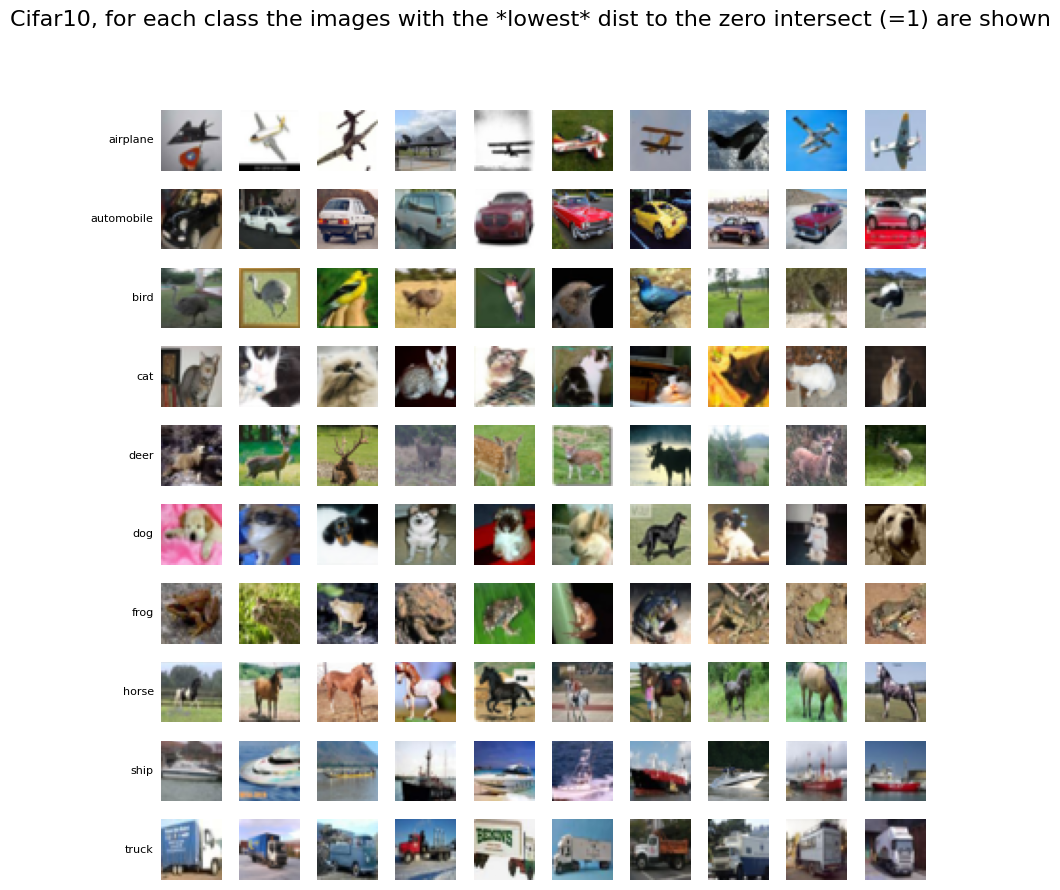

In [ ]:
path = "logs/Balanced-1000/stereo/version_0/checkpoint/epoch=999.ckpt"
embed_dict_stereo = get_embeds_for_ckpt(path, cifar10_train)
plot_images_per_class_with_norm_close_to_0_intersect_of_extra_dim(embed_dict_stereo)

logs/No_schedule-_No_decay-1000/l2/SimCLR-1000/embed_history.npy
first epoch norm,  min: 1.4739571  max: 16.878654
last epoch norm,  min: 0.040836133  max: 0.86844116


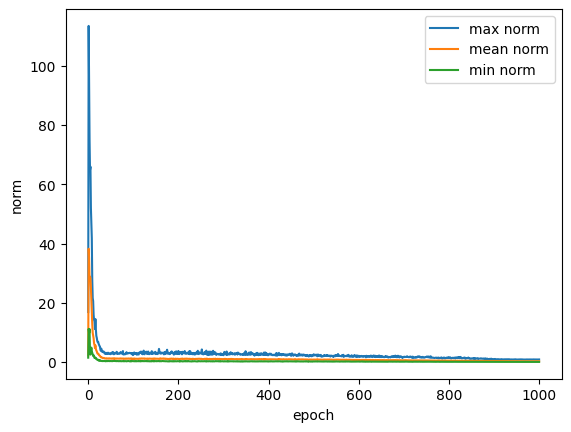

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Literal



def plot_history(
        embed_history,
        history_type: Literal["distance_history", "norm_history"] = "norm_history"
        ):
    metric = dict(
        norm_history = "norm",
        distance_history = "angular distance"
    )[history_type]

    history = embed_history[history_type]

    min_values = history.min(1)
    max_values = history.max(1)
    mean_values = history.mean(1)
    epochs = list(range(len(history)))
    print(f"first epoch {metric},  min:", min_values[0], " max:", max_values[0])
    print(f"last epoch {metric},  min:", min_values[-1]," max:", max_values[-1])

    plt.plot(epochs, max_values, label="max norm")
    plt.plot(epochs, mean_values, label="mean norm")
    plt.plot(epochs, min_values, label="min norm")
    plt.xlabel("epoch")
    plt.ylabel("norm")
    plt.legend()
    plt.show()

path = "logs/No_schedule-_No_decay-1000/l2/SimCLR-1000/embed_history.npy"
with open(path, "rb") as f:
    embed_history = np.load(f, allow_pickle=True).item()
print(path)

plot_history(embed_history, "norm_history")

In [1]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=2
from plotting_utils import *

env: CUDA_VISIBLE_DEVICES=2


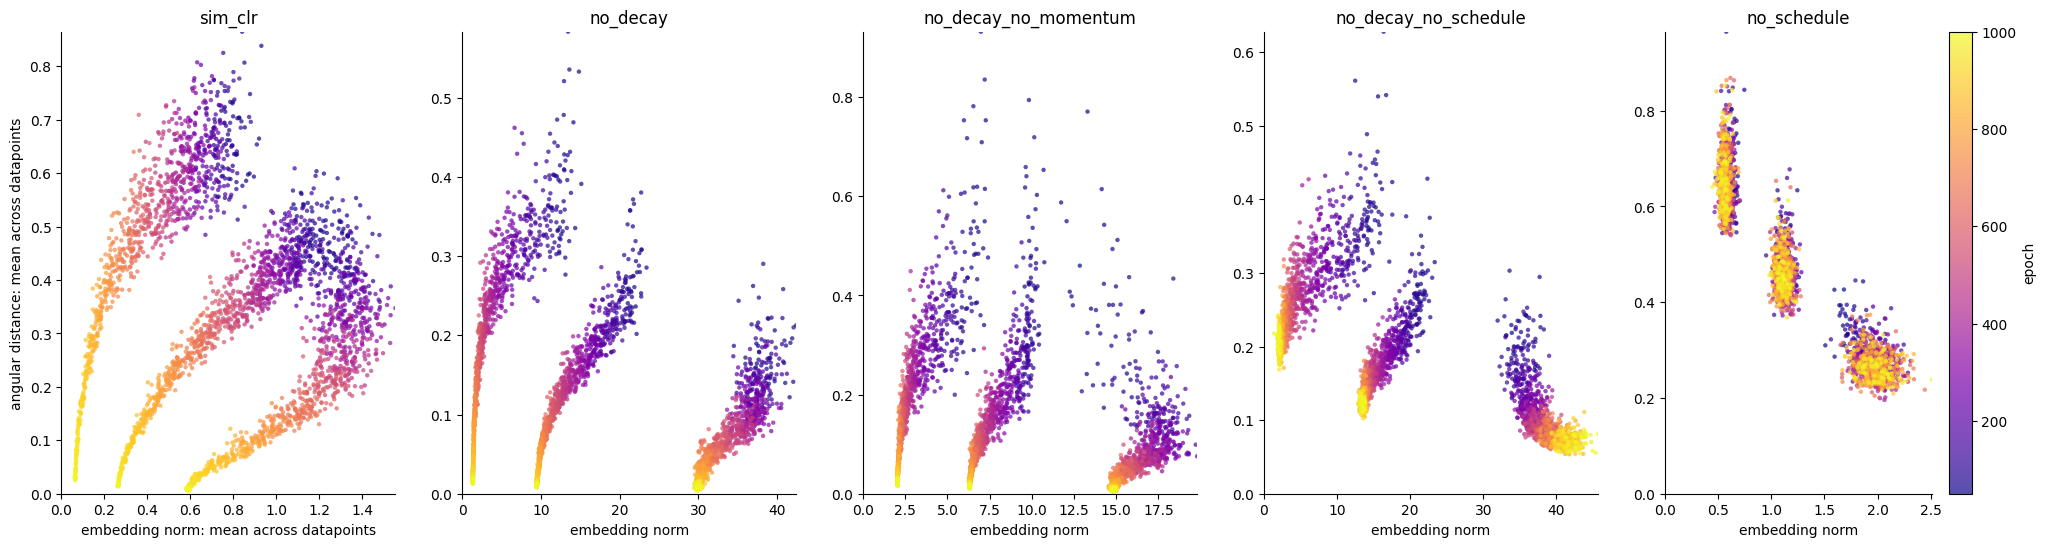

In [12]:
from plotting_utils import plot_paths_mean_over_extreme_points_dist_norm_epoch

paths = dict(
    sim_clr = "logs/No_schedule-_No_decay-1000/l2/SimCLR-1000/embed_history.npy",
    # gradscale = "logs/Point_tracking-1000/gradscale/version_46/embed_history.npy",
    # inv_gradscale = "logs/Point_tracking-1000/inv_gradscale/version_3/embed_history.npy",
    no_decay = "logs/No_schedule-_No_decay-1000/l2/no_decay/embed_history.npy",
    no_decay_no_momentum = "logs/No_schedule-_No_decay-1000/l2/no_decay-no_momentum/embed_history.npy",
    no_decay_no_schedule = "logs/No_schedule-_No_decay-1000/l2/no_decay-no_schedule/embed_history.npy",
    no_schedule = "logs/No_schedule-_No_decay-1000/l2/no_schedule/embed_history.npy",
    # mono = "logs/Point_tracking-1000/mono/version_2/embed_history.npy"
)
starting_epoch = 50
moving_average_size = 1
line_or_scatter = "scatter"
share_axis = False
only_mean = False

plot_paths_mean_over_extreme_points_dist_norm_epoch(
    paths,
    starting_epoch=starting_epoch,
    extreme_at_end_in="norm",
    share_axis=share_axis,
    moving_average_size=moving_average_size,
    line_or_scatter=line_or_scatter,
    only_mean=only_mean
    )

In [ ]:
plot_paths_mean_over_extreme_points_dist_norm_epoch(
    paths,
    starting_epoch=starting_epoch,
    extreme_at_end_in="distance",
    share_axis=share_axis,
    moving_average_size=moving_average_size,
    line_or_scatter=line_or_scatter,
    only_mean=only_mean
    )

In [21]:
import numpy as np


variant_path = dict(
    sim_clr = "logs/No_schedule-_No_decay-1000/l2/SimCLR-1000/embed_history.npy",
    # gradscale = "logs/Point_tracking-1000/gradscale/version_46/embed_history.npy",
    # inv_gradscale = "logs/Point_tracking-1000/inv_gradscale/version_3/embed_history.npy",
    no_decay = "logs/No_schedule-_No_decay-1000/l2/no_decay/embed_history.npy",
    no_decay_no_momentum = "logs/No_schedule-_No_decay-1000/l2/no_decay-no_momentum/embed_history.npy",
    no_decay_no_schedule = "logs/No_schedule-_No_decay-1000/l2/no_decay-no_schedule/embed_history.npy",
    no_schedule = "logs/No_schedule-_No_decay-1000/l2/no_schedule/embed_history.npy",
    # mono = "logs/Point_tracking-1000/mono/version_2/embed_history.npy",
    with_certainty = "logs/No_schedule-_No_decay-1000/l2/with_certainty-1000/embed_history.npy",
    new_history_style = "logs/No_schedule-_No_decay-1000/l2/version_1/embed_history.npy"
)["new_history_style"]


with open(variant_path, "rb") as f:
    embed_histories = np.load(f, allow_pickle=True).item()

embed_histories["grad_norm_history"].shape

(100, 2, 50000)

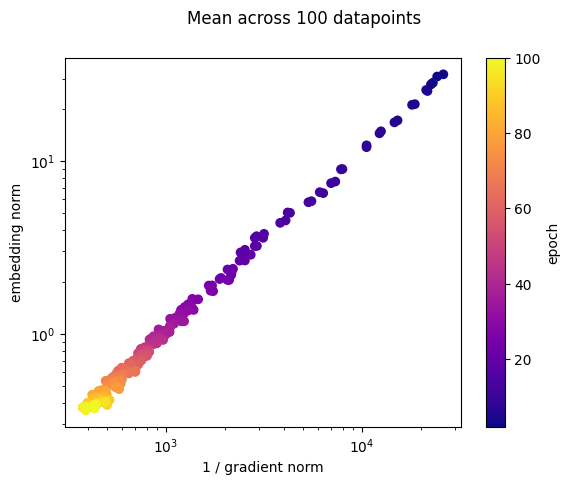

In [22]:
from matplotlib import pyplot as plt

def interweave(a,b):
    c = np.empty((a.shape[0] + b.shape[0], a.shape[1]), dtype=a.dtype)
    c[0::2] = a
    c[1::2] = b
    return c

def plt_gradient_norm_embedding_norm(embed_histories, idx_count, start_from_epoch, log_scale=False):

    grad_norm_history = embed_histories["grad_norm_history"]
    train_norm_history = embed_histories["train_norm_history"]

    # interweaving view 1 and view 2 norm, because during training there are always 2 views
    x = 1 / interweave(grad_norm_history[:,0], grad_norm_history[:,1])[2*start_from_epoch:, :idx_count].mean(1)
    y = interweave(train_norm_history[:,0], train_norm_history[:,1])[2*start_from_epoch:, :idx_count].mean(1)

    epoch_n = grad_norm_history.shape[0]
    # repeat 2 for 2 views
    color = np.repeat(np.linspace(start_from_epoch, epoch_n, int(len(x)/2)),2)
    cmap = "plasma"

    scatter = plt.scatter(x, y, c=color, cmap=cmap)
    plt.colorbar(scatter, label="epoch")
    plt.xlabel("1 / gradient norm")
    plt.ylabel("embedding norm")
    if log_scale:
        plt.xscale("log")
        plt.yscale("log")
    plt.suptitle(f"Mean across {idx_count} datapoints")
    plt.show()

plt_gradient_norm_embedding_norm(embed_histories, idx_count=100, start_from_epoch=2, log_scale=True)